## Stock Price Prediction Using LSTM

-Dowloaded data from: https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm
-Here, I took the historical index data of *TESLA* 50 from 5th October 2020 upto 5th September 2021

**WHAT IS LSTM?**
-LSTM is a special type of neural network which has a memory cell, this memory cell is being updated by 3 gates.
-Input gate: It just adds the information to the neural network
-Forget gate: It forgets the unnecessary data feed into the network
-Output gate: It going to get the desired answer out of the neural network.



![][id1]

[id1]: https://cdn-codespeedy.pressidium.com/wp-content/uploads/2019/11/0.png

The input data is passed into the neural network and is updated for every input data

In [21]:
#importing the packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler

#used for setting the output figure size
rcParams['figure.figsize'] = 20,10

#to normalize the given input data
scaler = MinMaxScaler(feature_range=(0, 1))

#to read input data set (place the file name inside  ' ') as shown below
todataframe = pd.read_csv('Nifty.csv')

#to print the first few data in the data set
todataframe

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,05-Oct-2020,11487.80,11578.05,11452.30,11503.35,530597393,31341.55
1,06-Oct-2020,11603.45,11680.30,11564.30,11662.40,561444728,30373.65
2,07-Oct-2020,11679.25,11763.05,11629.35,11738.85,513367516,32935.98
3,08-Oct-2020,11835.40,11905.70,11791.15,11834.60,608768573,38677.49
4,09-Oct-2020,11852.05,11938.60,11805.20,11914.20,611079482,34546.80
...,...,...,...,...,...,...,...
224,30-Aug-2021,16775.85,16951.50,16764.85,16931.05,283483108,23615.87
225,31-Aug-2021,16947.50,17153.50,16915.85,17132.20,464390247,40147.89
226,01-Sep-2021,17185.60,17225.75,17055.05,17076.25,301894634,27691.93
227,02-Sep-2021,17095.40,17245.50,17059.70,17234.15,242377518,22620.36


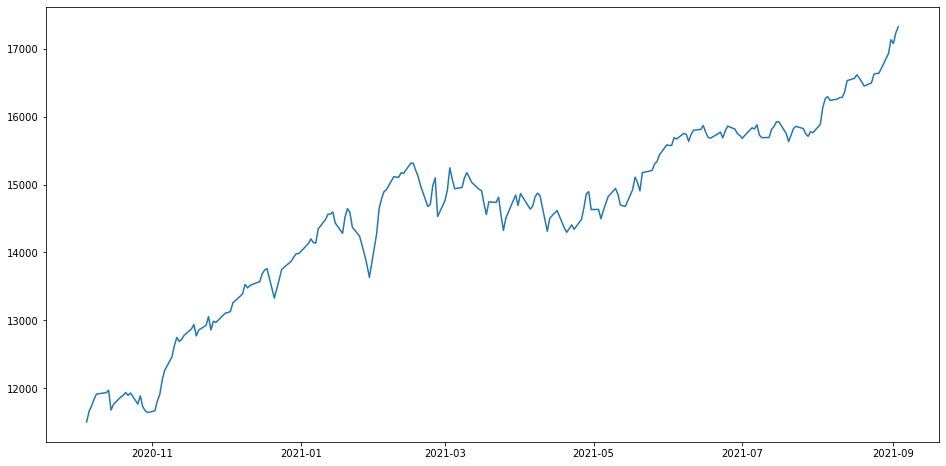

In [24]:
todataframe['Date'] = pd.to_datetime(todataframe.Date,format='%d-%b-%Y')
todataframe.index = todataframe['Date']
plt.figure(figsize=(16,8))
plt.plot(todataframe['Close'], label='Closing Price')

In [36]:
#importing the packages 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


#dataframe creation
seriesdata = todataframe.sort_index(ascending=True, axis=0)
new_seriesdata = pd.DataFrame(index=range(0,len(todataframe)),columns=['Date','Close'])
length_of_data=len(seriesdata)
for i in range(0,length_of_data):
    new_seriesdata['Date'][i] = seriesdata['Date'][i]
    new_seriesdata['Close'][i] = seriesdata['Close'][i]
    

#setting the index again
new_seriesdata.index = new_seriesdata.Date
new_seriesdata.drop('Date', axis=1, inplace=True)


#creating train and test sets this comprises the entire data’s present in the dataset
myseriesdataset = new_seriesdata.values
totrain = myseriesdataset[0:255,:]
tovalid = myseriesdataset[255:,:]


#converting dataset into x_train and y_train
scalerdata = MinMaxScaler(feature_range=(0, 1))
scale_data = scalerdata.fit_transform(myseriesdataset)
x_totrain, y_totrain = [], []
length_of_totrain=len(totrain)
for i in range(60,length_of_totrain):
    x_totrain.append(scale_data[i-60:i,0])
    y_totrain.append(scale_data[i,0])
x_totrain, y_totrain = np.array(x_totrain), np.array(y_totrain)
x_totrain = np.reshape(x_totrain, (x_totrain.shape[0],x_totrain.shape[1],1))


#LSTM neural network
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_totrain.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adadelta')
lstm_model.fit(x_totrain, y_totrain, epochs=200, batch_size=1, verbose=2)


#predicting next data stock price
myinputs = new_seriesdata[len(new_seriesdata) - (len(tovalid)+1) - 60:].values
myinputs = myinputs.reshape(-1,1)
myinputs  = scalerdata.transform(myinputs)
tostore_test_result = []
for i in range(60,myinputs.shape[0]):
    tostore_test_result.append(myinputs[i-60:i,0])
tostore_test_result = np.array(tostore_test_result)
tostore_test_result = np.reshape(tostore_test_result,(tostore_test_result.shape[0],tostore_test_result.shape[1],1))
myclosing_priceresult = lstm_model.predict(tostore_test_result)
myclosing_priceresult = scalerdata.inverse_transform(myclosing_priceresult)

Epoch 1/200
169/169 - 4s - loss: 0.3403
Epoch 2/200
169/169 - 3s - loss: 0.3158
Epoch 3/200
169/169 - 3s - loss: 0.2908
Epoch 4/200
169/169 - 3s - loss: 0.2654
Epoch 5/200
169/169 - 3s - loss: 0.2398
Epoch 6/200
169/169 - 3s - loss: 0.2141
Epoch 7/200
169/169 - 3s - loss: 0.1886
Epoch 8/200
169/169 - 3s - loss: 0.1638
Epoch 9/200
169/169 - 3s - loss: 0.1399
Epoch 10/200
169/169 - 3s - loss: 0.1172
Epoch 11/200
169/169 - 3s - loss: 0.0960
Epoch 12/200
169/169 - 3s - loss: 0.0770
Epoch 13/200
169/169 - 3s - loss: 0.0602
Epoch 14/200
169/169 - 3s - loss: 0.0460
Epoch 15/200
169/169 - 3s - loss: 0.0344
Epoch 16/200
169/169 - 3s - loss: 0.0254
Epoch 17/200
169/169 - 3s - loss: 0.0186
Epoch 18/200
169/169 - 3s - loss: 0.0137
Epoch 19/200
169/169 - 3s - loss: 0.0103
Epoch 20/200
169/169 - 3s - loss: 0.0080
Epoch 21/200
169/169 - 3s - loss: 0.0065
Epoch 22/200
169/169 - 3s - loss: 0.0056
Epoch 23/200
169/169 - 3s - loss: 0.0051
Epoch 24/200
169/169 - 3s - loss: 0.0048
Epoch 25/200
169/169 - 3s

Epoch 199/200
169/169 - 3s - loss: 0.0037
Epoch 200/200
169/169 - 3s - loss: 0.0037


In [37]:
#predicting next data stock price
myinputs = new_seriesdata[len(new_seriesdata) - (len(tovalid)+1) - 60:].values

In [38]:
print(len(tostore_test_result));
print(myclosing_priceresult);

1
[[16400.371]]


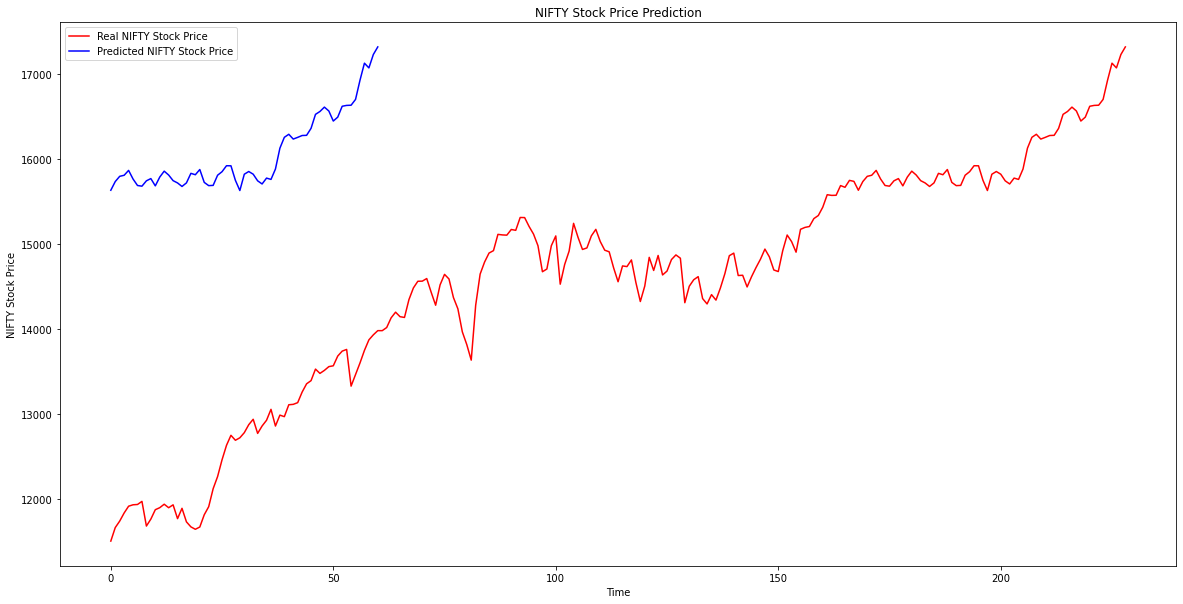

In [39]:
# Visualising the results

plt.plot(myseriesdataset, color = 'red', label = 'Real NIFTY Stock Price')
plt.plot(myinputs, color = 'blue', label = 'Predicted NIFTY Stock Price')
plt.title('NIFTY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NIFTY Stock Price')
plt.legend()
plt.show()